<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-Contact-Problems-on-Jura-G1-Trays" data-toc-modified-id="Example-Contact-Problems-on-Jura-G1-Trays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example Contact Problems on Jura G1 Trays</a></span></li><li><span><a href="#Example-Contact-Problems-on-Fairfield-G2-Trays" data-toc-modified-id="Example-Contact-Problems-on-Fairfield-G2-Trays-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example Contact Problems on Fairfield G2 Trays</a></span><ul class="toc-item"><li><span><a href="#Example-Heatmap-TotalCounts-Deviation-ARZ-for-each-setup" data-toc-modified-id="Example-Heatmap-TotalCounts-Deviation-ARZ-for-each-setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example Heatmap TotalCounts Deviation ARZ for each setup</a></span></li><li><span><a href="#Example-Heatmap-TotalCounts-Deviation-KCL-for-each-setup-and-tray" data-toc-modified-id="Example-Heatmap-TotalCounts-Deviation-KCL-for-each-setup-and-tray-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example Heatmap TotalCounts Deviation KCL for each setup and tray</a></span></li><li><span><a href="#Example-Heatmap-TotalCounts-Deviation-ARZ-for-each-setup-from-2021-08-20" data-toc-modified-id="Example-Heatmap-TotalCounts-Deviation-ARZ-for-each-setup-from-2021-08-20-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Example Heatmap TotalCounts Deviation ARZ for each setup from 2021-08-20</a></span></li></ul></li></ul></div>

In [16]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.sensirion.lokal/sensirion/stable


In [ ]:
import pandas as pd
import numpy as np
from sensirion_database_access import DatabaseAccess
import matplotlib.pyplot as plt
from sensirion_pmcalib_eval_tools.alignment_lab import pm_calib_heatmap
%matplotlib inline

# Example Contact Problems on Jura G1 Trays

In [19]:
da = DatabaseAccess(interface="databricks", db_name='JuraDB', db_scheme="MC03")
da.connect()

col_list = ["DeviceId", "TestNameThatBinned", "BinCode", "Site", "TrayId"]
filter_list = ["StartTime>'2021-06-01'"]

df = da.fetch(column_list=col_list, filter_list=filter_list, include_limits=True)
df.head()

[INFO] 6e0c8610-50d6-4524-a9eb-d1807f84d5e4 - TokenRequest:Getting a new token from a refresh token


BinCode  SiteId DeviceId  HardBinCode  PmTrayId  \
StartTime                                                             
2021-07-01 10:09:43      70    17.0     None          4.0      50.0   
2021-07-01 10:09:43      71     8.0     None         14.0      50.0   
2021-07-01 10:09:43      71     9.0     None         14.0      50.0   
2021-07-01 10:09:43      71    10.0     None         14.0      50.0   
2021-07-01 10:09:43      71    11.0     None         14.0      50.0   

                    DeviceIdInternal_LTL TestNameThatBinned  \
StartTime                                                     
2021-07-01 10:09:43                 None       VoltageScrew   
2021-07-01 10:09:43                 None               None   
2021-07-01 10:09:43                 None               None   
2021-07-01 10:09:43                 None               None   
2021-07-01 10:09:43                 None               None   

                    DeviceIdInternal_UTL  DeviceIdInternal  TrayId  Site  
StartTime                                                                 
2021-07-01 10:09:43                 None               NaN     3.0  17.0  
2021-07-01 10:09:43                 None               NaN     3.0   8.0  
2021-07-01 10:09:43                 None               NaN     3.0   9.0  
2021-07-01 10:09:43                 None               NaN     3.0  10.0  
2021-07-01 10:09:43                 None               NaN     3.0  11.0

In [20]:
df.PmTrayId.unique()

array([50., 48., nan])

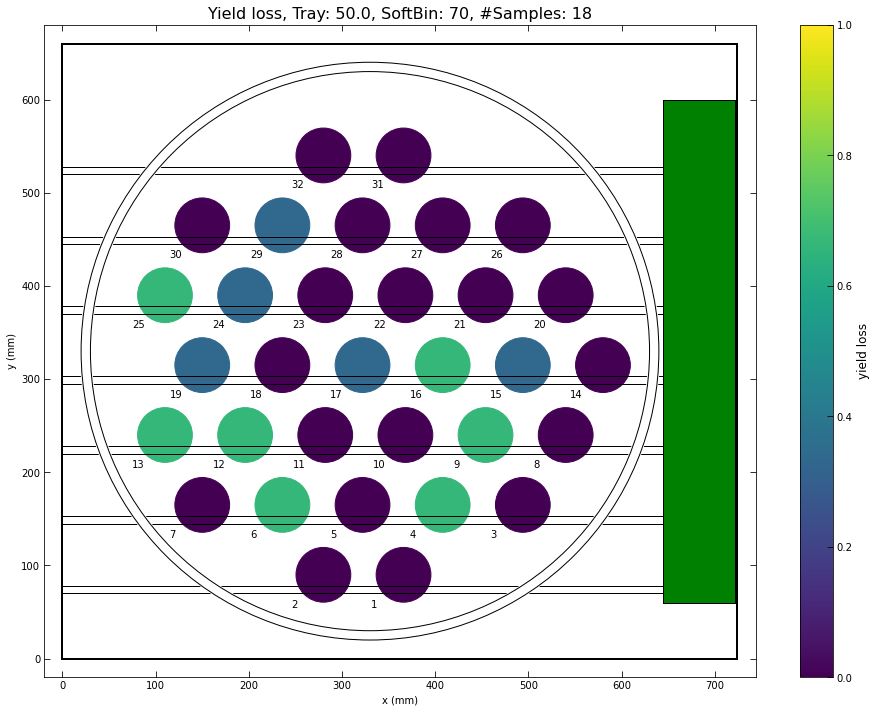

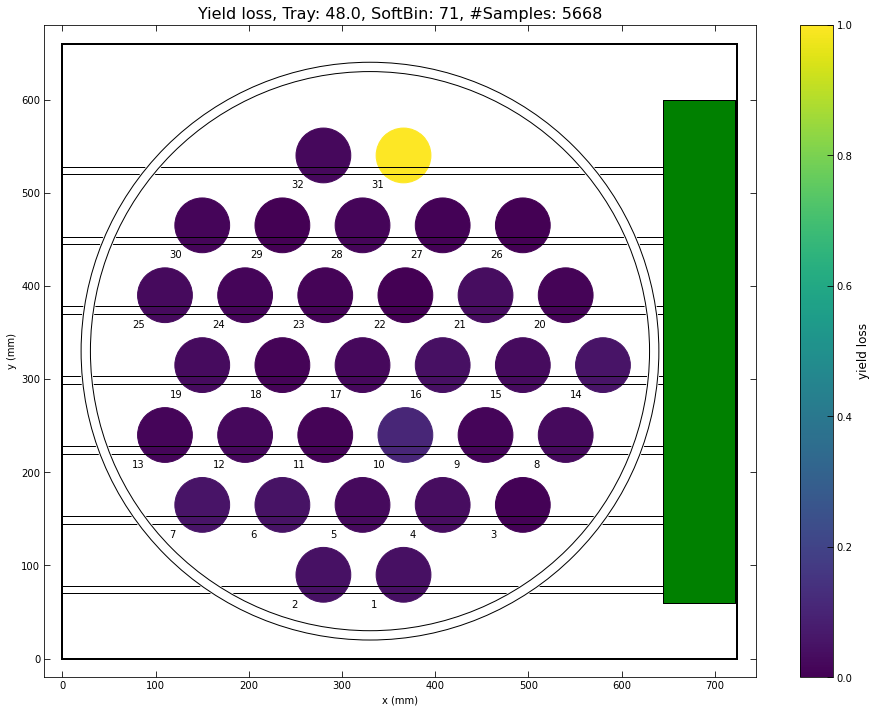

In [21]:
for tray in df.PmTrayId.unique():
    if not np.isnan(tray):
        for sb in ['70', '71']:
            yield_loss = df.query("PmTrayId==@tray").groupby("Site").apply(lambda x: len(x[x.BinCode==sb])/len(x))
            pm_calib_heatmap(yield_loss, 'G1', title='Yield loss, Tray: {}, SoftBin: {}, #Samples: {}'.format(tray, sb, len(df.query("PmTrayId==@tray").DeviceId.unique())), cb_label='yield loss', cb_limits=(0,1))

# Example Contact Problems on Fairfield G2 Trays

In [38]:
da = DatabaseAccess(interface="databricks", db_name='FairfieldDB', db_scheme="MC03")
da.connect()

col_list = ["DeviceId", "TestNameThatBinned", "BinCode", "Site", "TrayId"]
filter_list = ["StartTime>'2021-06-01'"]

df = da.fetch(column_list=col_list, filter_list=filter_list, include_limits=True)
df.head()

[INFO] 4a5b31b0-67a1-485c-82b0-b5dc655247af - TokenRequest:Getting a new token from a refresh token


BinCode  SiteId          DeviceId  HardBinCode  PmTrayId  \
StartTime                                                                      
2021-06-01 08:01:13      01     6.0  039AA58E43E92E49          0.0      69.0   
2021-06-01 08:01:13      01    21.0  EB1B27E0D32F9EB6          0.0      69.0   
2021-06-01 08:01:13      01    53.0  145DF7693EB65769          0.0      69.0   
2021-06-01 08:01:13      01    11.0  46E6DD3272F850BB          0.0      69.0   
2021-06-01 08:01:13      01    10.0  FDD5B81406CCC22F          0.0      69.0   

                    DeviceIdInternal_LTL TestNameThatBinned  \
StartTime                                                     
2021-06-01 08:01:13                 None               None   
2021-06-01 08:01:13                 None               None   
2021-06-01 08:01:13                 None               None   
2021-06-01 08:01:13                 None               None   
2021-06-01 08:01:13                 None               None   

                    DeviceIdInternal_UTL  DeviceIdInternal  TrayId  Site  
StartTime                                                                 
2021-06-01 08:01:13                 None      2.597020e+17     2.0   6.0  
2021-06-01 08:01:13                 None     -1.505566e+18     2.0  21.0  
2021-06-01 08:01:13                 None      1.467601e+18     2.0  53.0  
2021-06-01 08:01:13                 None      5.109014e+18     2.0  11.0  
2021-06-01 08:01:13                 None     -1.560162e+17     2.0  10.0

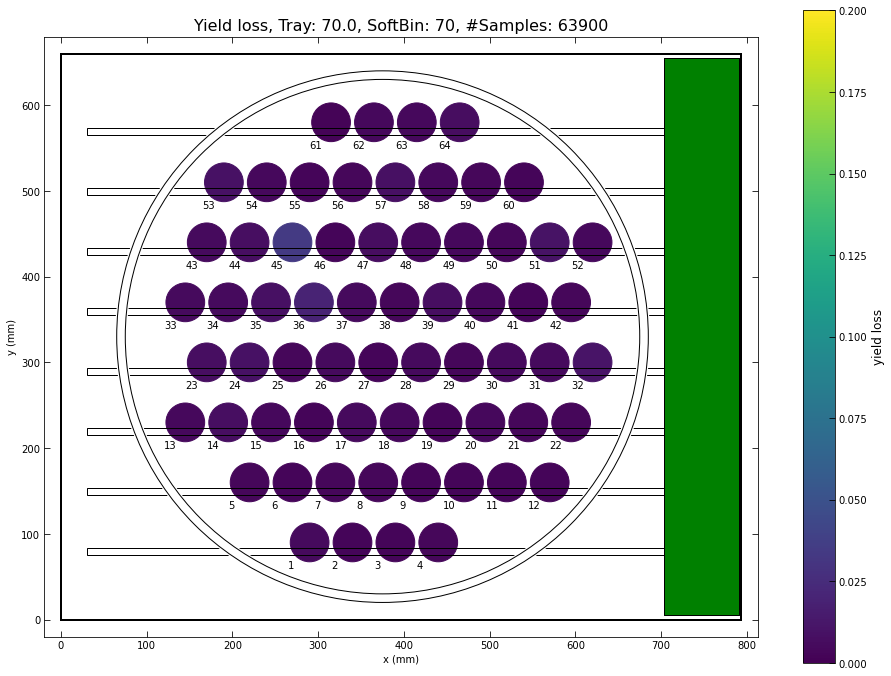

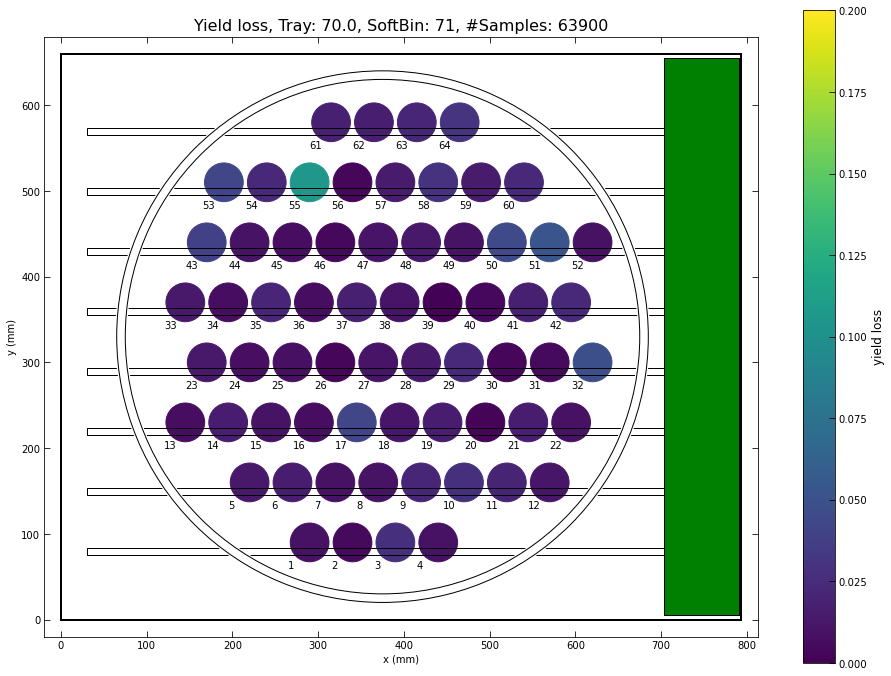

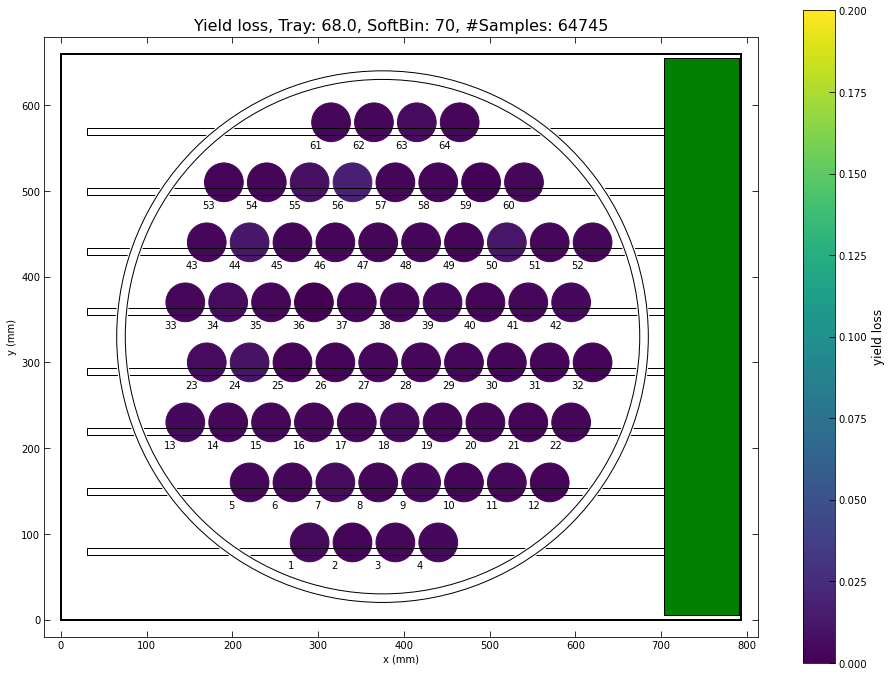

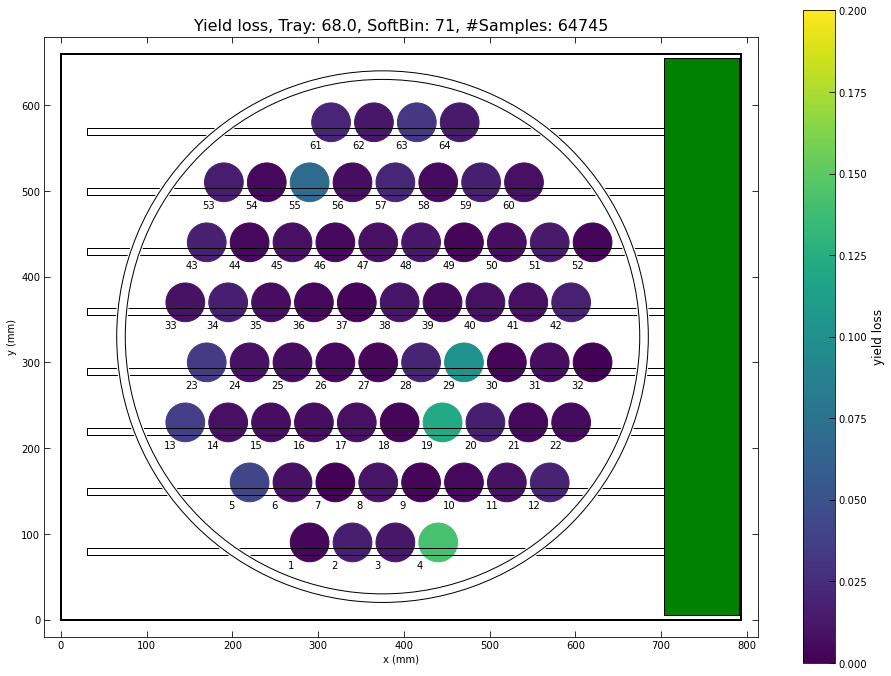

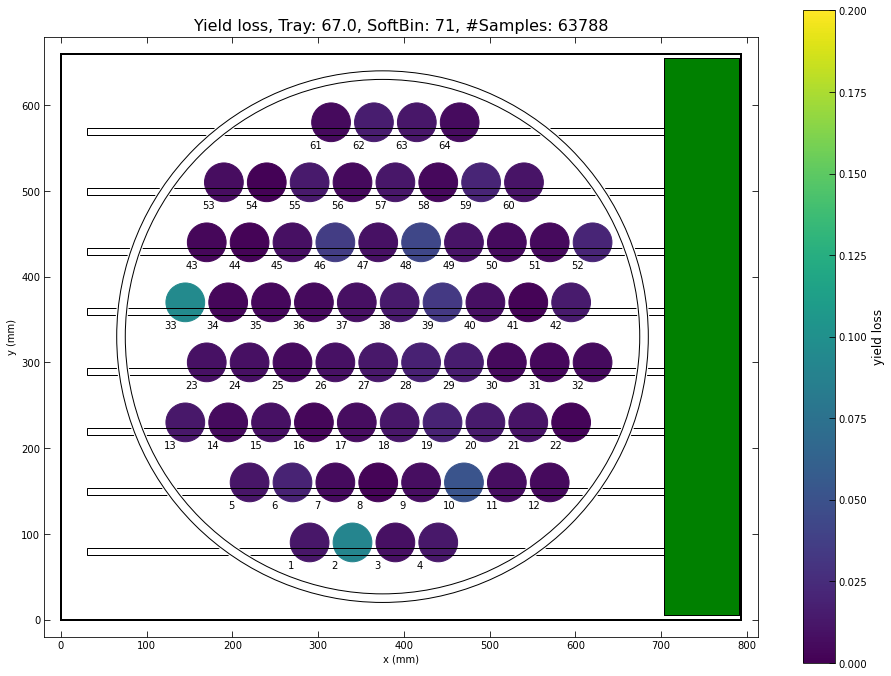

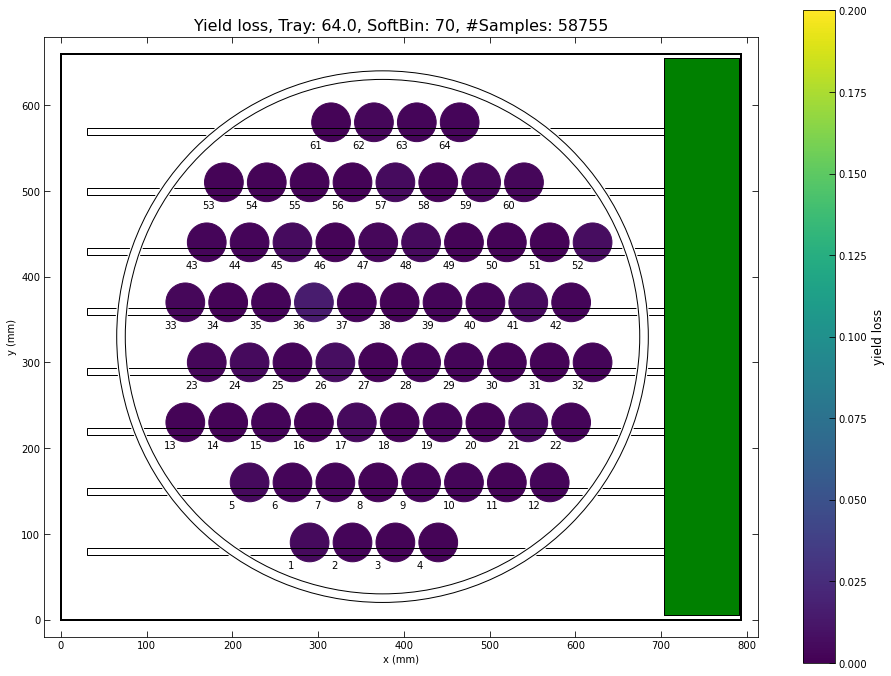

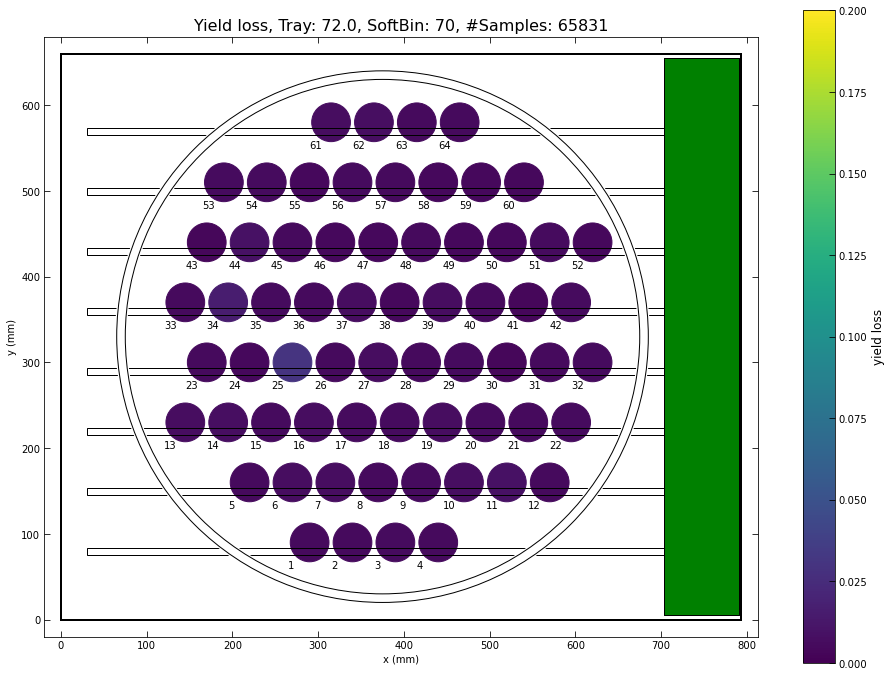

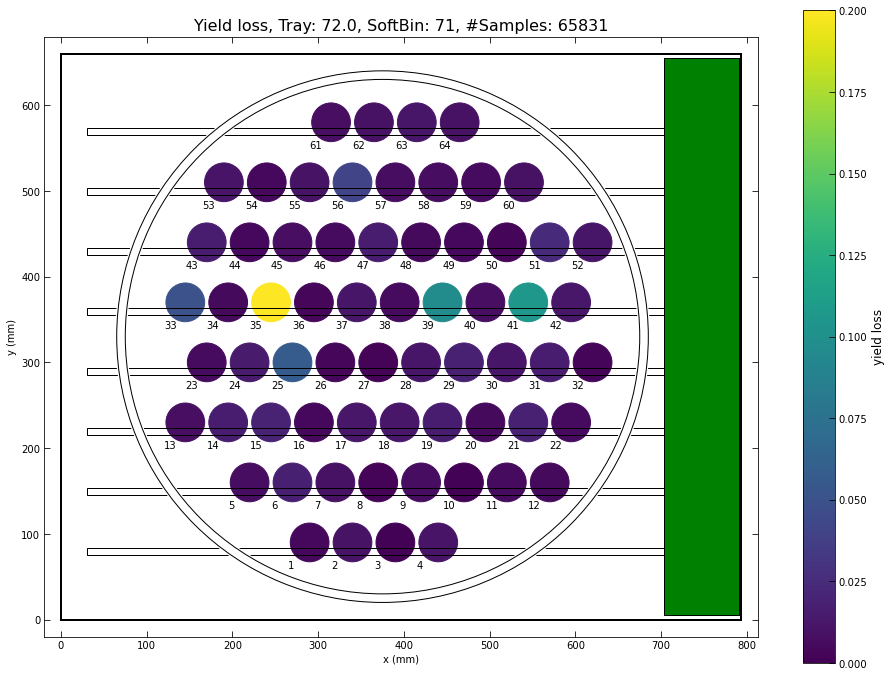

In [40]:
for tray in df.PmTrayId.unique():
    if not np.isnan(tray):
        for sb in ['70', '71']:
            yield_loss = df.query("PmTrayId==@tray").groupby("Site").apply(lambda x: len(x[x.BinCode==sb])/len(x))
            pm_calib_heatmap(yield_loss, 'G2', title='Yield loss, Tray: {}, SoftBin: {}, #Samples: {}'.format(tray, sb, len(df.query("PmTrayId==@tray").DeviceId.unique())), cb_label='yield loss', cb_limits=(0,0.2))

In [88]:
da = DatabaseAccess(interface="databricks", db_name='FairfieldDB', db_scheme="MC03")
da.connect()

col_list = ["DeviceId", "TestNameThatBinned", "BinCode", "Site", "TrayId", "Accuracy", "PmSetupId", "TotalCounts", "SubstrateSessionId", "StartDateTime"]
filter_list = ["StartTime>'2021-06-01'"]

df = da.fetch(column_list=col_list, filter_list=filter_list, include_limits=False)
df['StartDateTimeUTC'] = pd.to_datetime(df['StartDateTimeUTC'])
df.head()

[INFO] c0a45c85-edde-4a68-a475-4e34cd25d596 - TokenRequest:Getting a new token from a refresh token


SiteId             StartDateTimeUTC  DeviceIdInternal  \
StartTime                                                                    
2021-06-01 08:01:13     6.0  2021-06-01 00:01:13.6829791      2.597020e+17   
2021-06-01 08:01:13    21.0  2021-06-01 00:01:13.6829791     -1.505566e+18   
2021-06-01 08:01:13    53.0  2021-06-01 00:01:13.6829791      1.467601e+18   
2021-06-01 08:01:13    11.0  2021-06-01 00:01:13.6829791      5.109014e+18   
2021-06-01 08:01:13    10.0  2021-06-01 00:01:13.6829791     -1.560162e+17   

                     Site  Pm2p5MassConcDutAccuracy_Remeasurement  \
StartTime                                                           
2021-06-01 08:01:13   6.0                               -0.058022   
2021-06-01 08:01:13  21.0                               -0.024422   
2021-06-01 08:01:13  53.0                               -0.064852   
2021-06-01 08:01:13  11.0                               -0.021216   
2021-06-01 08:01:13  10.0                               -0.023306   

                    TestNameThatBinned  \
StartTime                                
2021-06-01 08:01:13               None   
2021-06-01 08:01:13               None   
2021-06-01 08:01:13               None   
2021-06-01 08:01:13               None   
2021-06-01 08:01:13               None   

                     Pm2p5NumbConcDutAccuracy_Remeasurement BinCode  \
StartTime                                                             
2021-06-01 08:01:13                               -0.058067      01   
2021-06-01 08:01:13                               -0.027886      01   
2021-06-01 08:01:13                               -0.066275      01   
2021-06-01 08:01:13                               -0.021776      01   
2021-06-01 08:01:13                               -0.023696      01   

                     TotalCounts_1          DeviceId  SubstrateSessionId  \
StartTime                                                                  
2021-06-01 08:01:13          626.0  039AA58E43E92E49             20240.0   
2021-06-01 08:01:13          637.0  EB1B27E0D32F9EB6             20240.0   
2021-06-01 08:01:13          548.0  145DF7693EB65769             20240.0   
2021-06-01 08:01:13          536.0  46E6DD3272F850BB             20240.0   
2021-06-01 08:01:13          566.0  FDD5B81406CCC22F             20240.0   

                     HardBinCode  TotalCounts_2  PmTrayId  PmSetupId  TrayId  
StartTime                                                                     
2021-06-01 08:01:13          0.0          444.0      69.0  CN-100340     2.0  
2021-06-01 08:01:13          0.0          505.0      69.0  CN-100340     2.0  
2021-06-01 08:01:13          0.0          376.0      69.0  CN-100340     2.0  
2021-06-01 08:01:13          0.0          430.0      69.0  CN-100340     2.0  
2021-06-01 08:01:13          0.0          412.0      69.0  CN-100340     2.0

## Example Heatmap TotalCounts Deviation ARZ for each setup

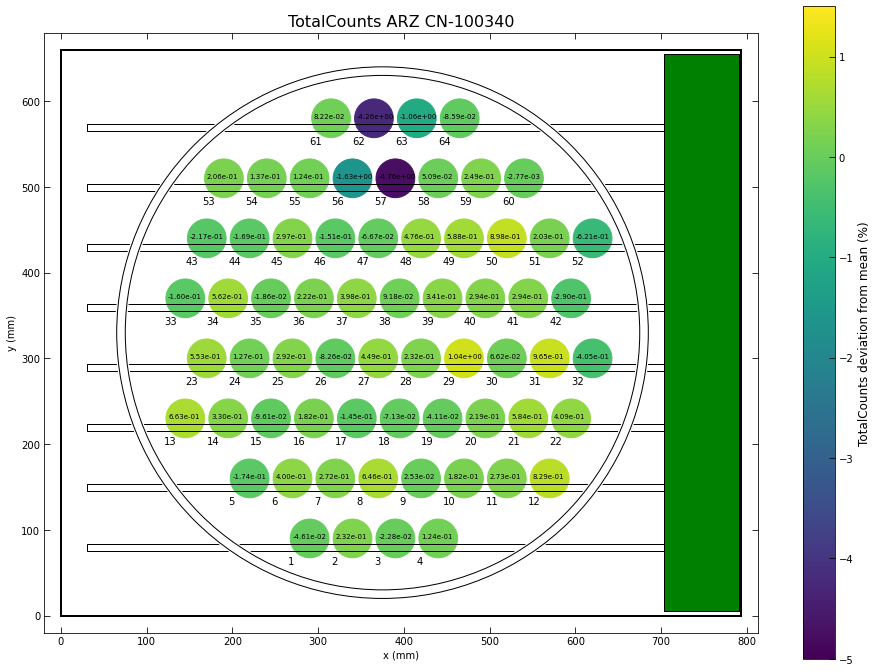

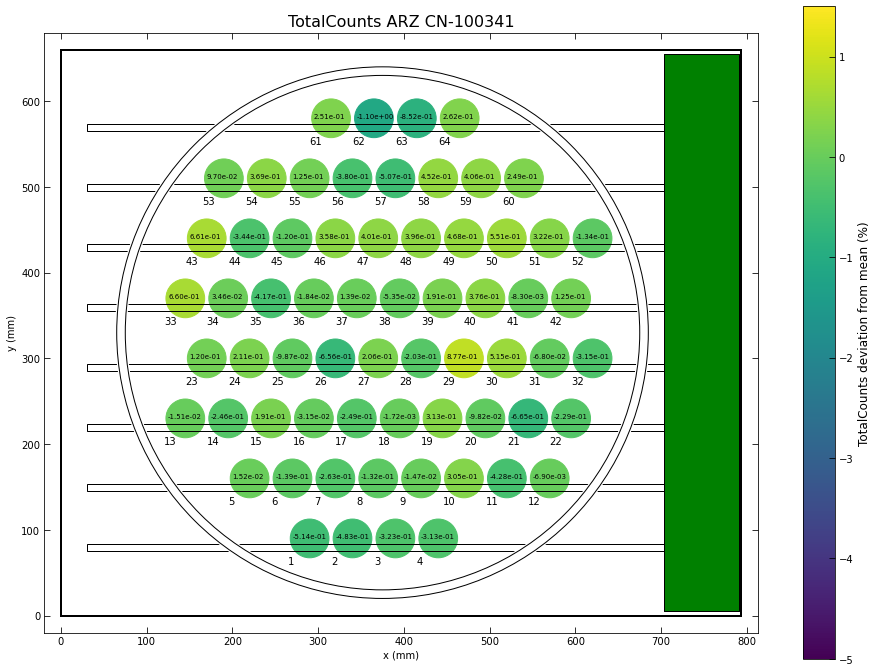

In [69]:
for setup in df.PmSetupId.unique():
    if setup is not None:
        data = (df.query("PmSetupId==@setup").groupby('SiteId')['TotalCounts_1'].mean()/df.query("PmSetupId==@setup")['TotalCounts_1'].mean()-1)*100
        pm_calib_heatmap(data, 'G2', title="TotalCounts ARZ {}".format(setup), cb_label='TotalCounts deviation from mean (%)', cb_limits=(-5,1.5), annotate=True)

## Example Heatmap TotalCounts Deviation KCL for each setup and tray

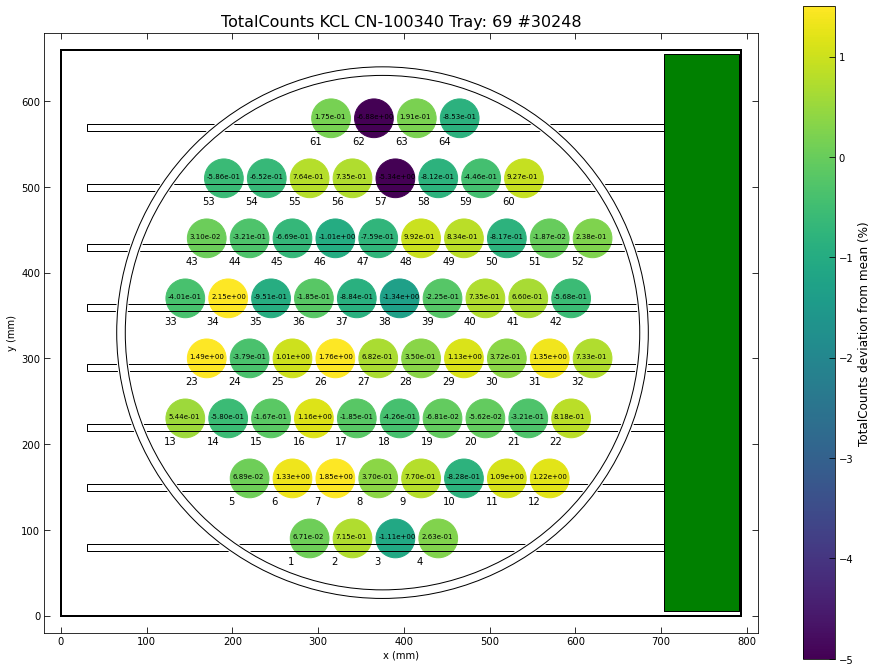

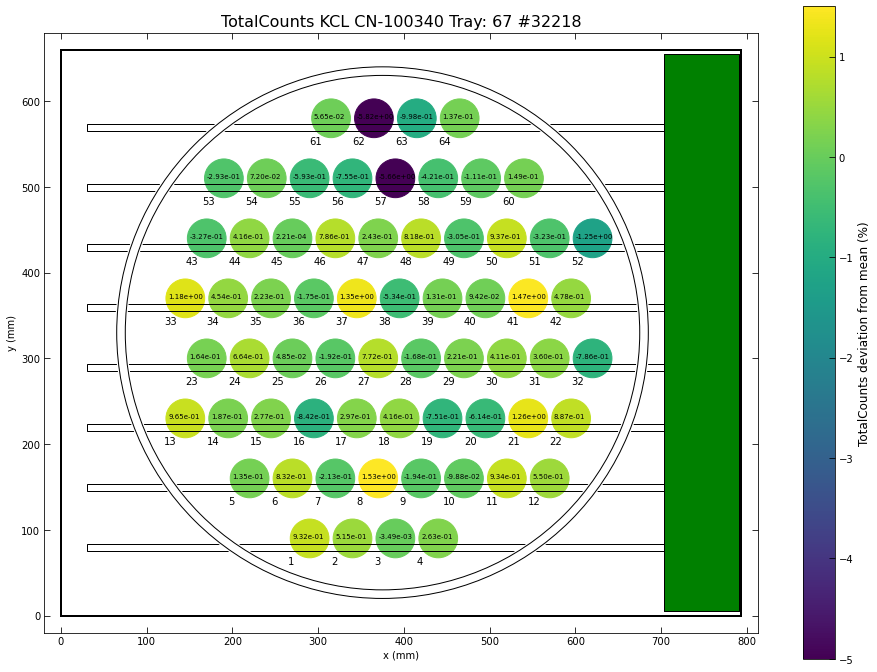

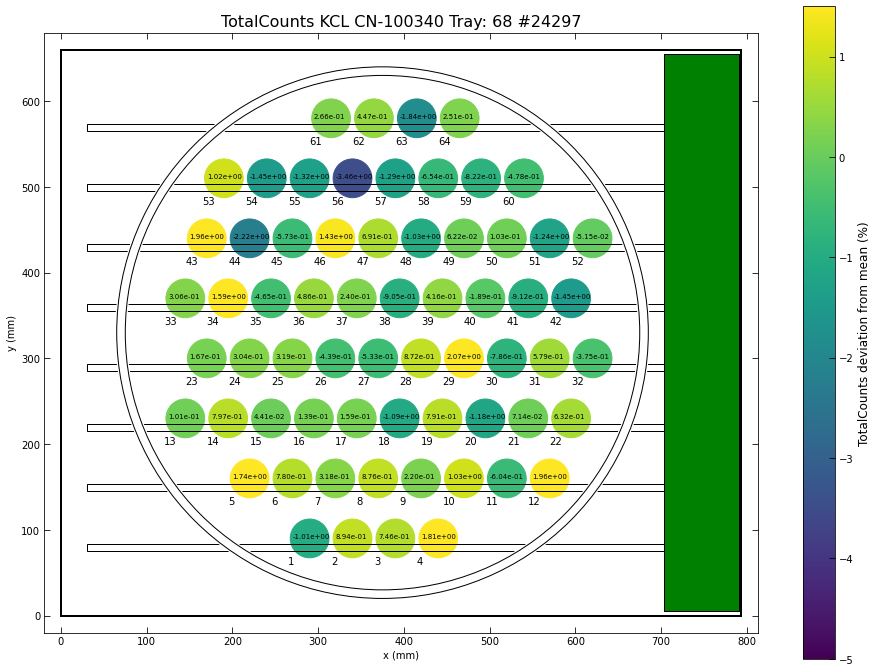

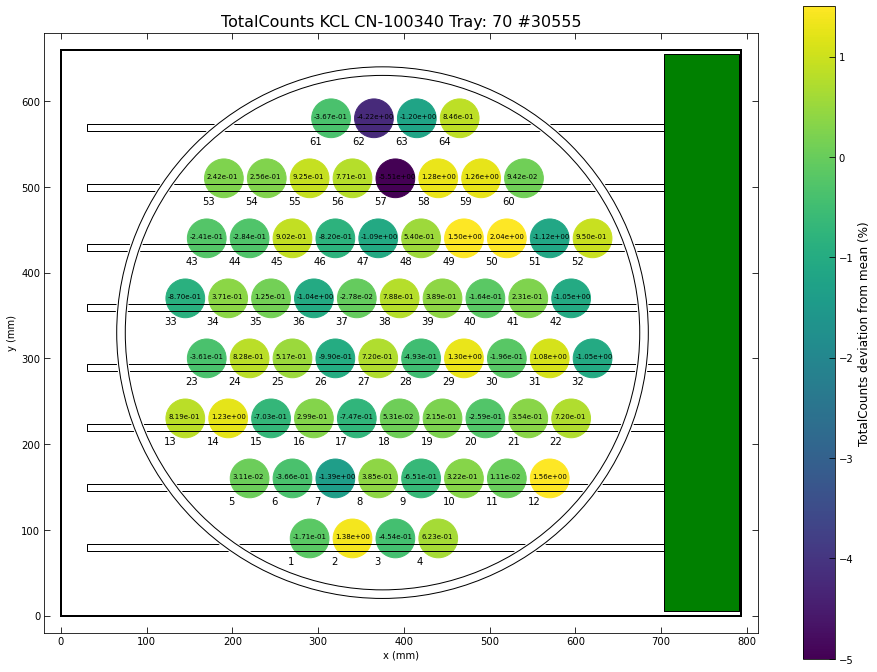

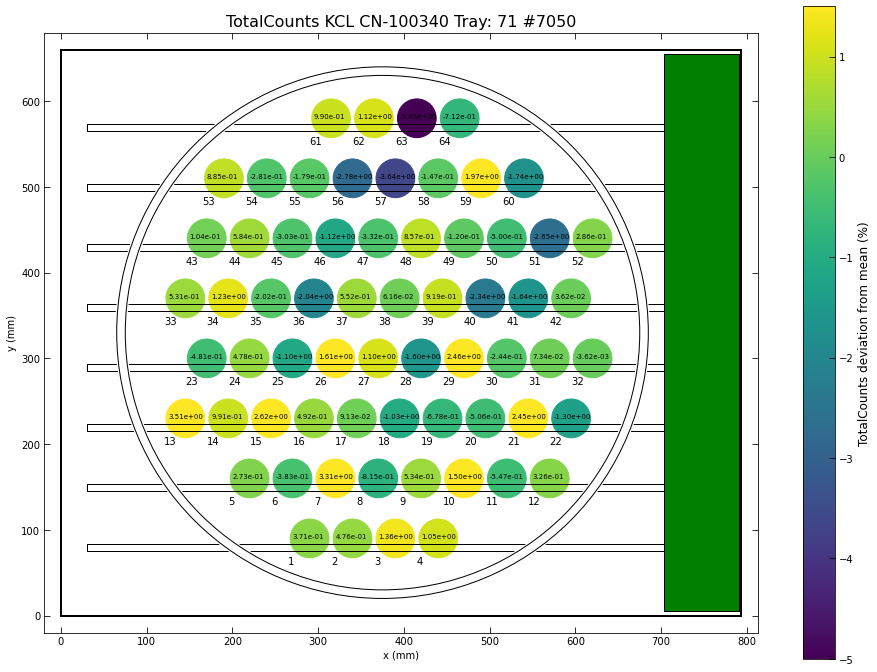

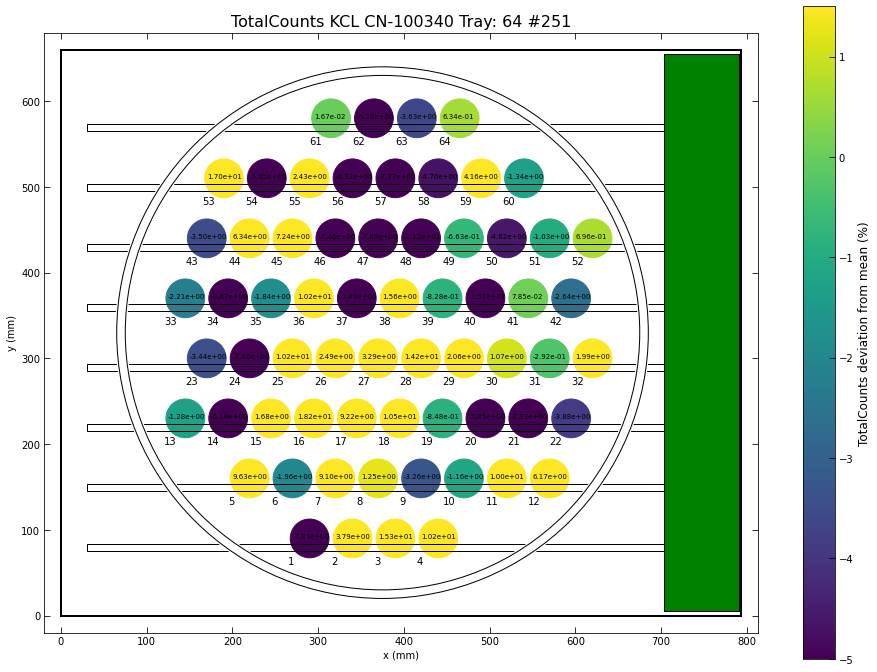

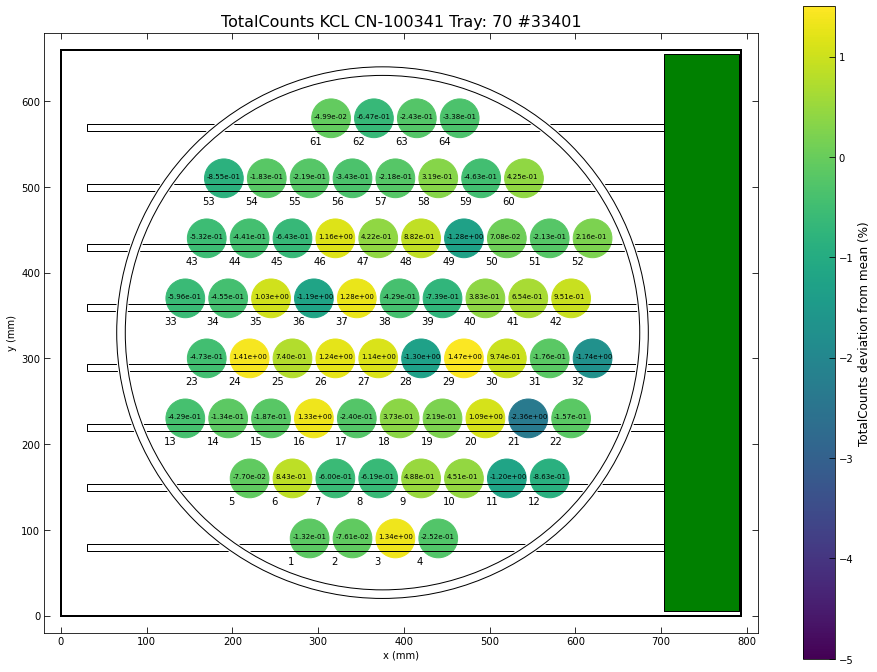

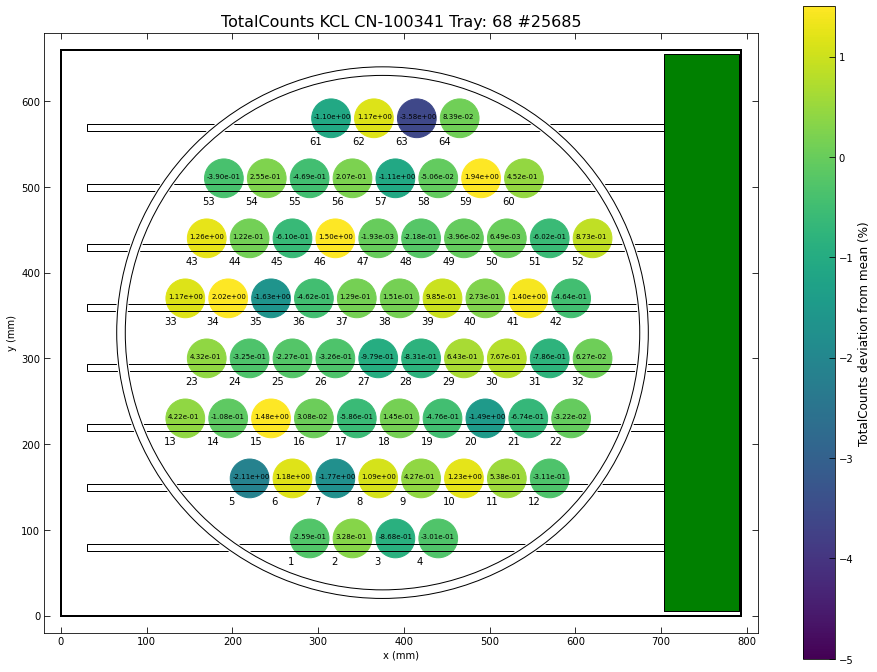

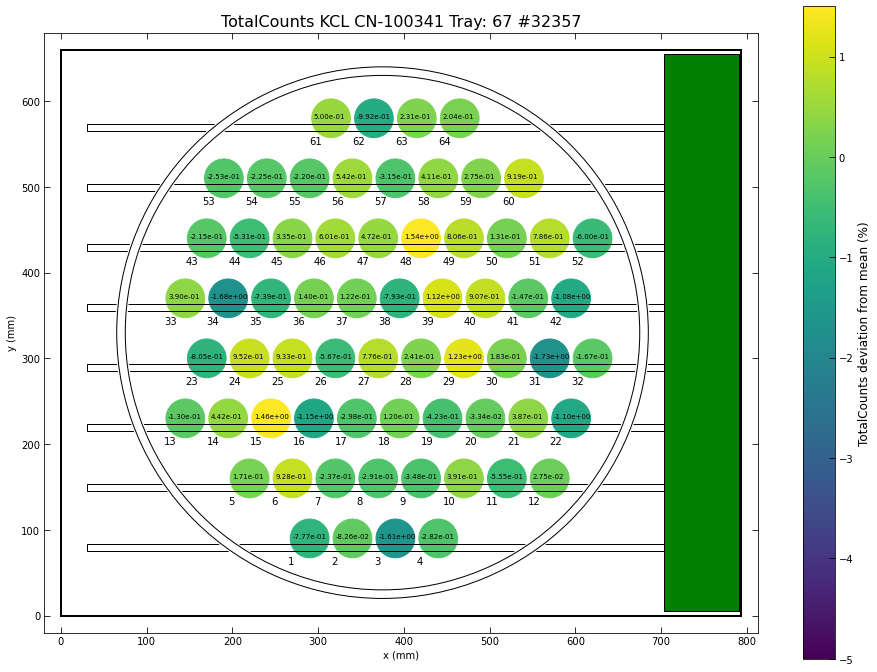

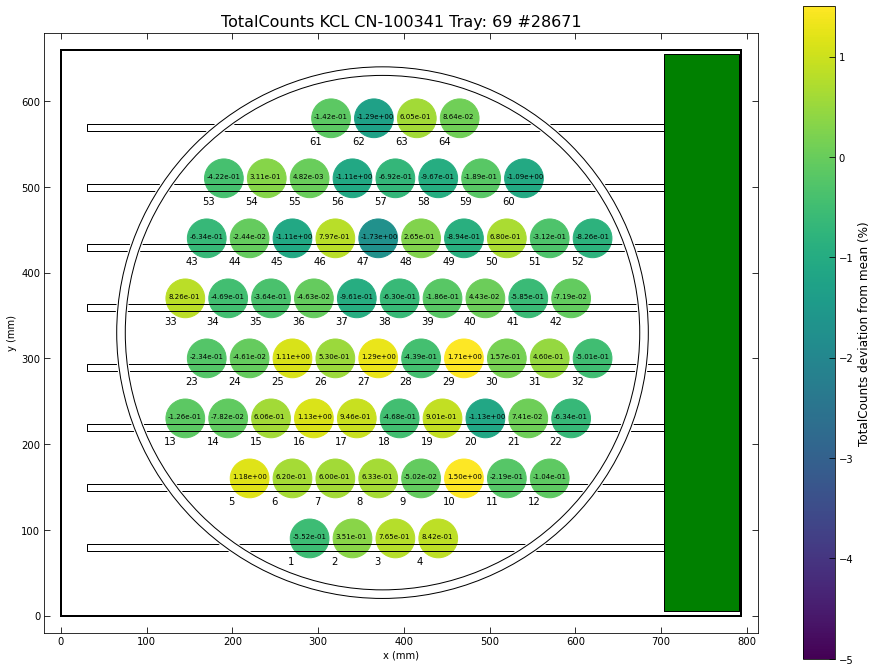

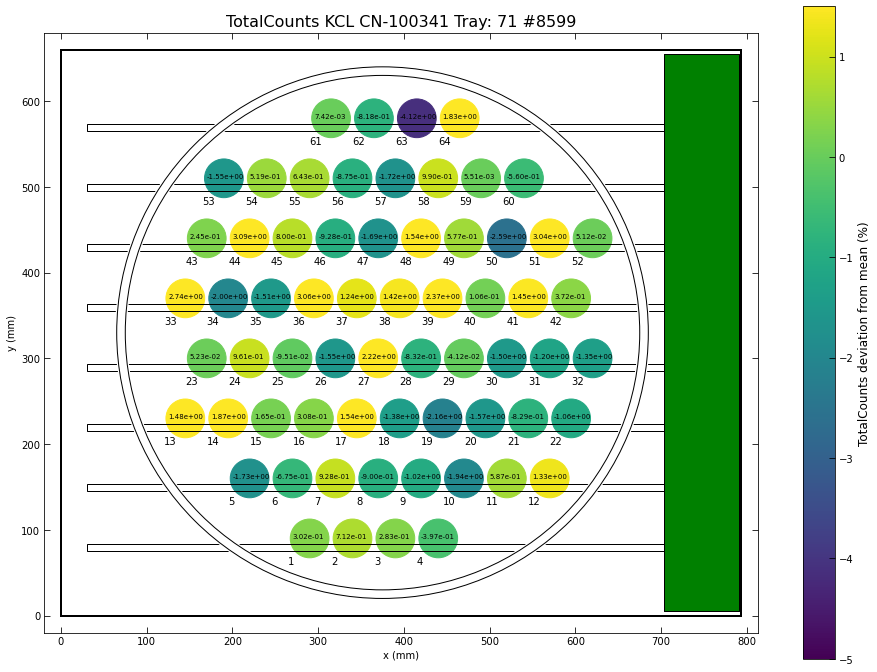

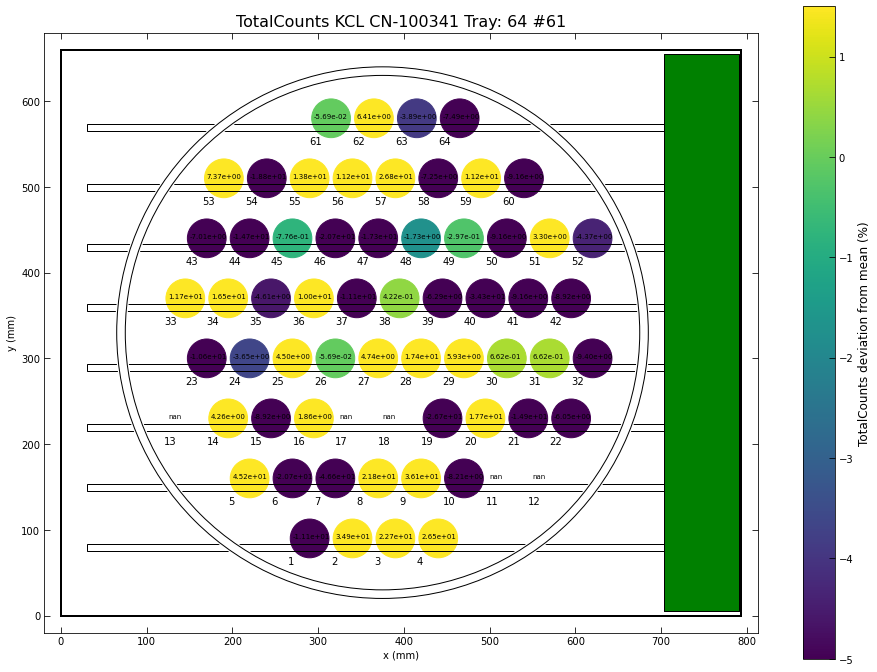

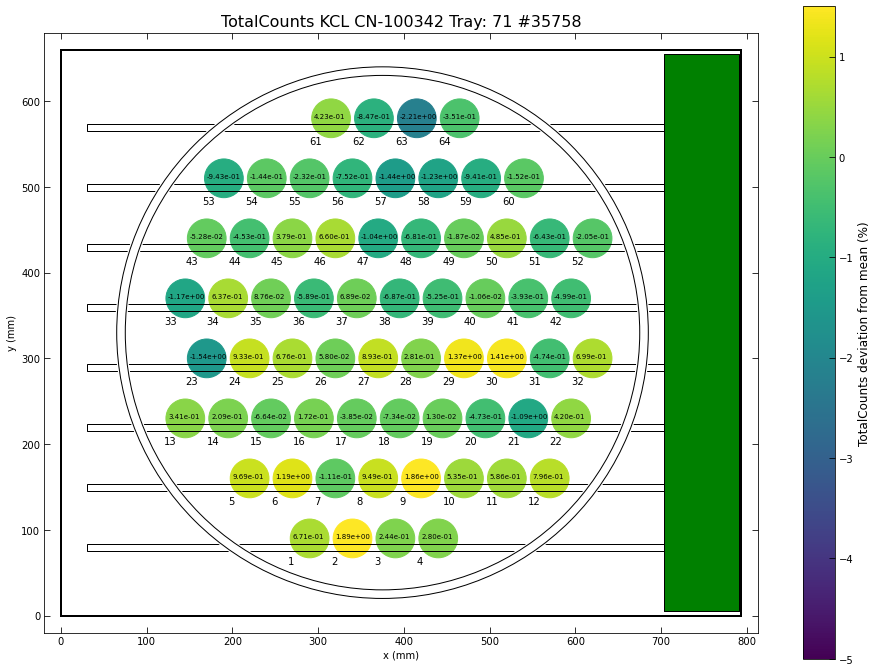

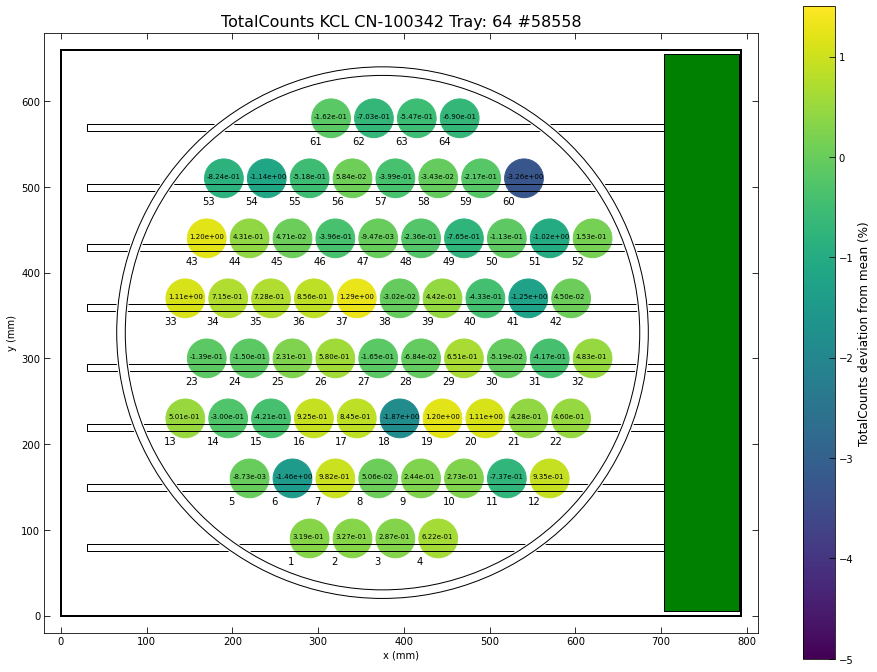

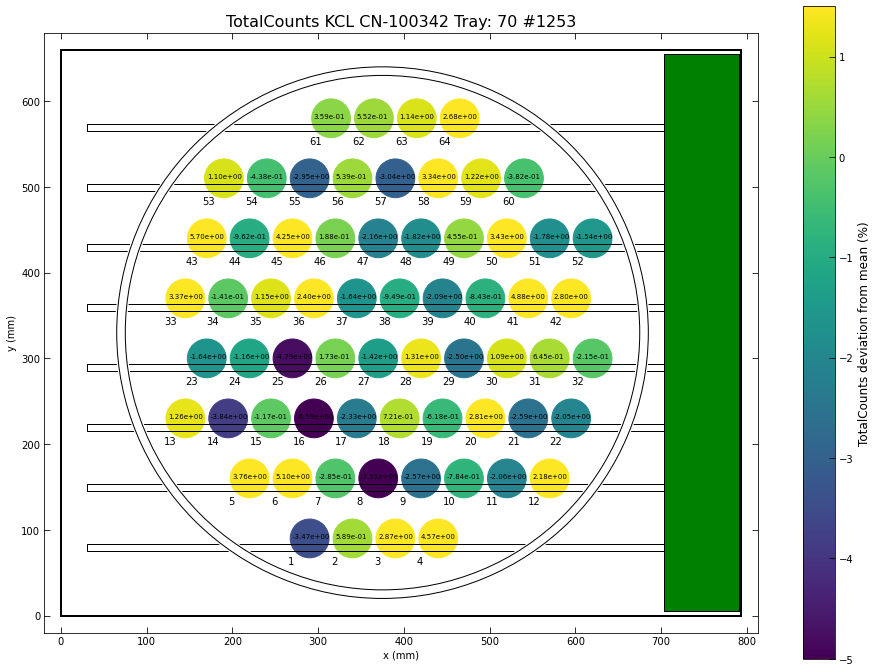

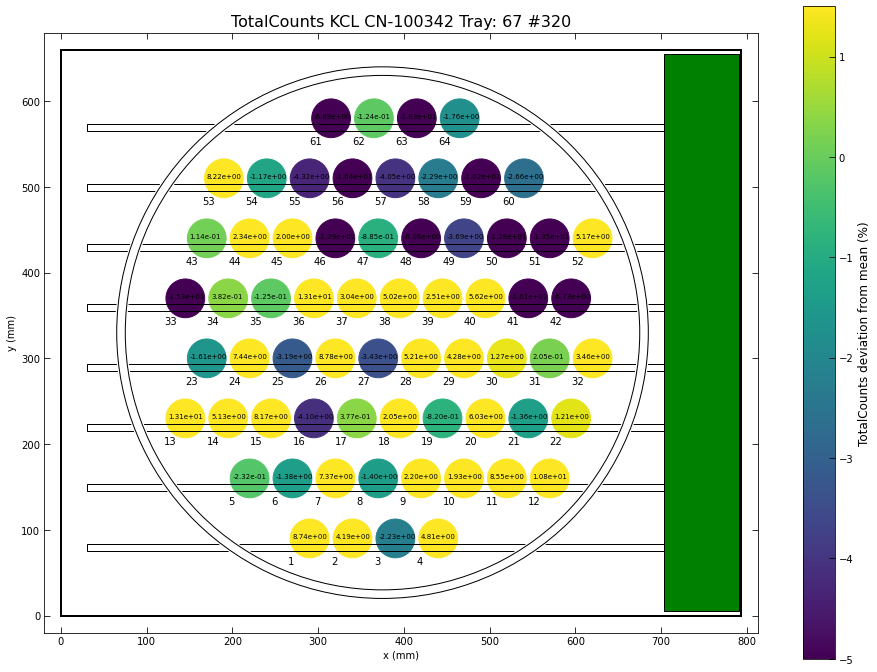

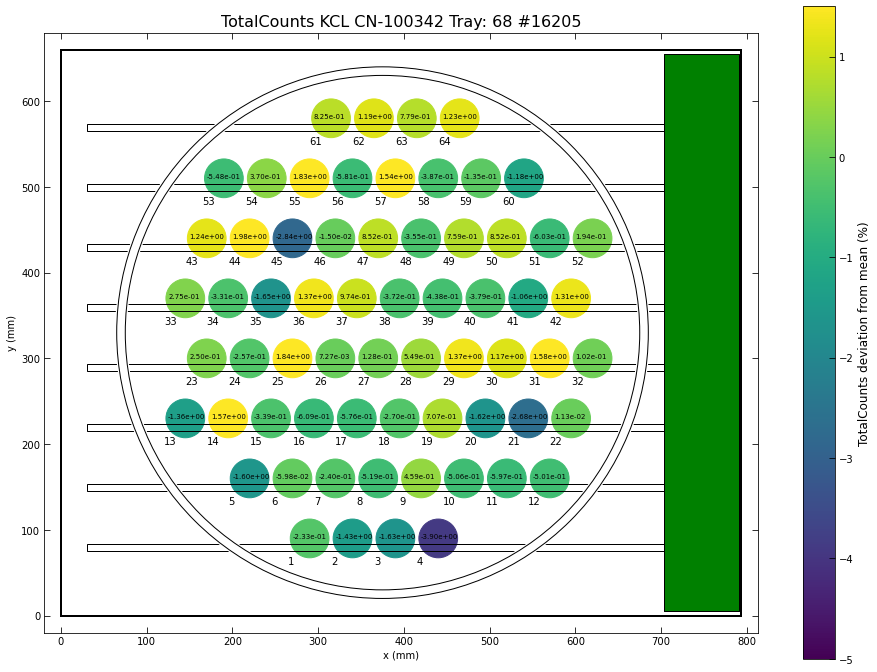

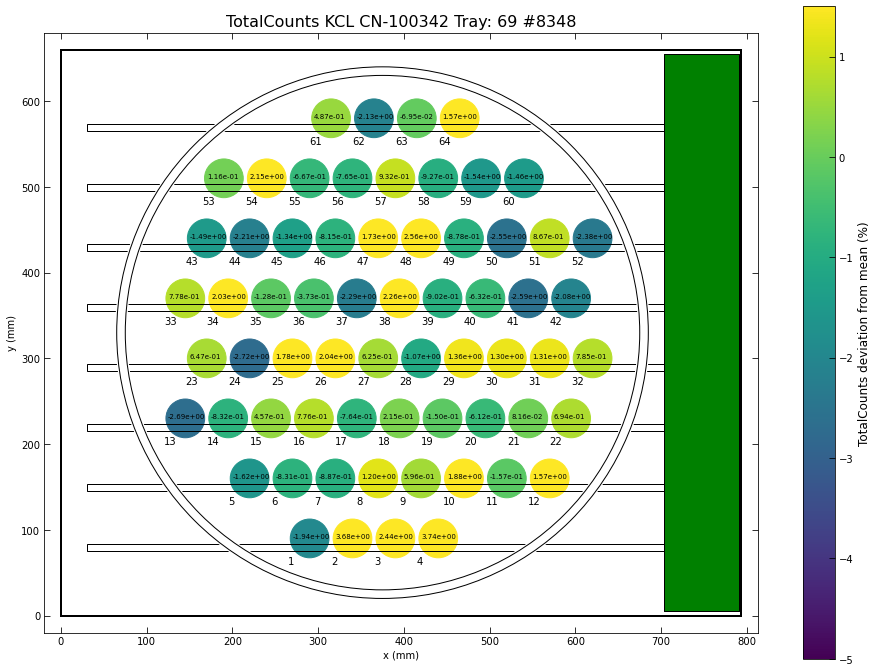

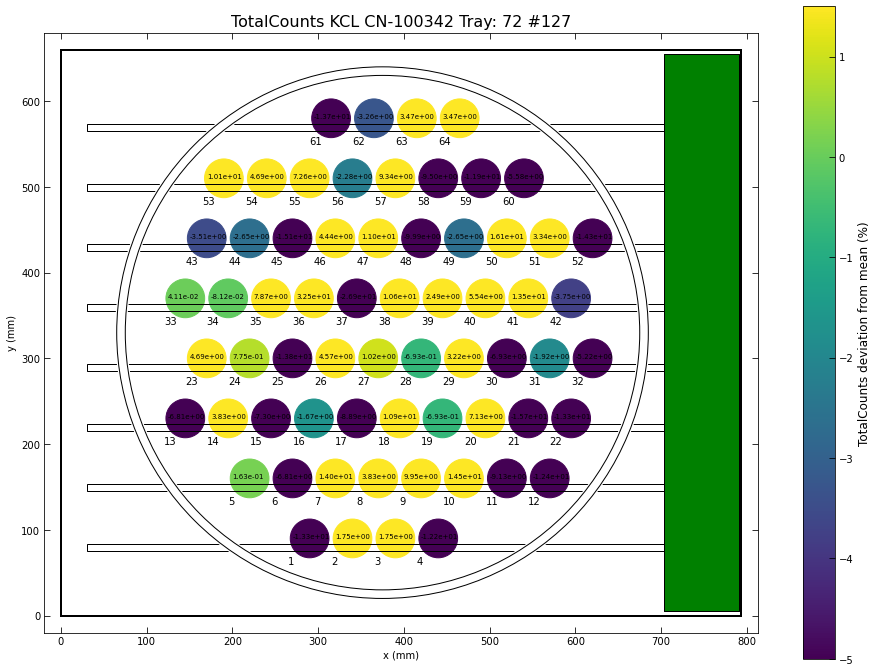

In [138]:
for setup in df.PmSetupId.unique():
    for tray in df.query("PmSetupId==@setup").PmTrayId.unique():
        if setup is not None or tray is not None:
            data = (df.query("PmSetupId==@setup and PmTrayId==@tray").groupby('SiteId')['TotalCounts_2'].mean()/df.query("PmSetupId==@setup and PmTrayId==@tray")['TotalCounts_2'].mean()-1)*100
            pm_calib_heatmap(data, 'G2', title="TotalCounts KCL {} Tray: {} #{}".format(setup, int(tray), len(df.query("PmSetupId==@setup and PmTrayId==@tray").DeviceId.unique())), cb_label='TotalCounts deviation from mean (%)', cb_limits=(-5,1.5), annotate=True)

## Example Heatmap TotalCounts Deviation ARZ for each setup from 2021-08-20

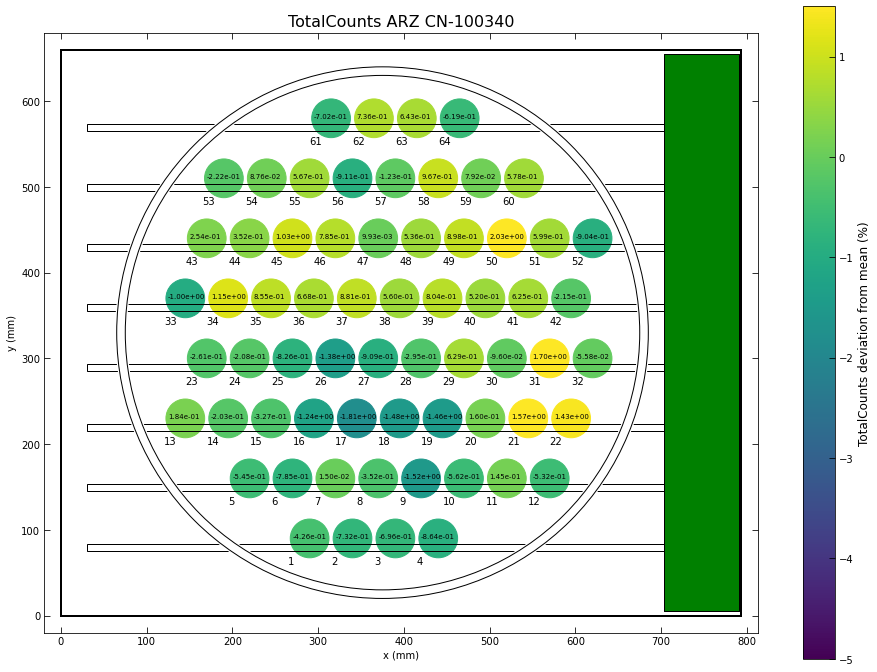

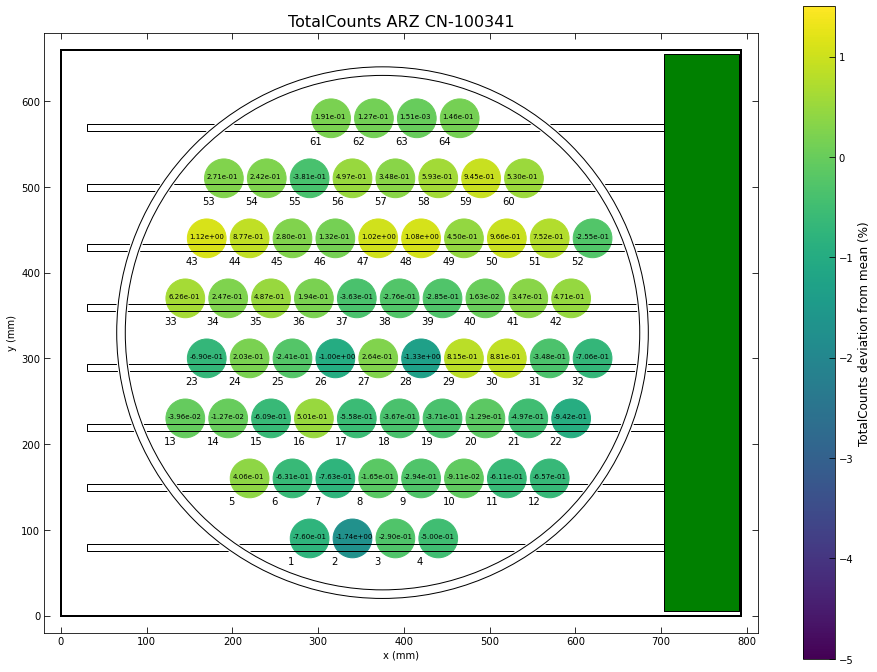

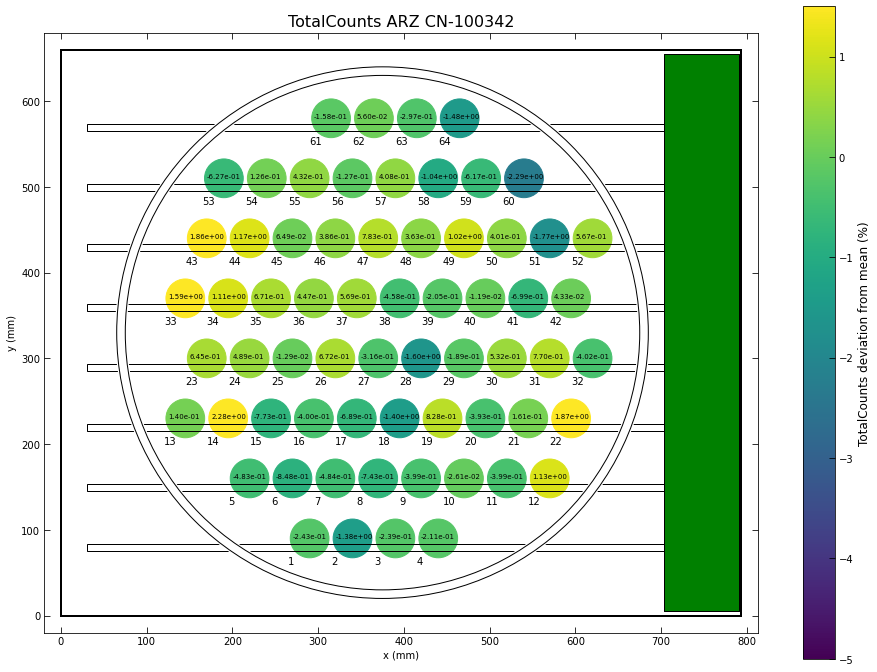

In [141]:
for setup in df.PmSetupId.unique():
    if setup is not None:
        data = (df[df.StartDateTimeUTC>pd.Timestamp(2021,8,20)].query("PmSetupId==@setup").groupby('SiteId')['TotalCounts_1'].mean()/df[df.StartDateTimeUTC>pd.Timestamp(2021,8,20)].query("PmSetupId==@setup")['TotalCounts_1'].mean()-1)*100
        pm_calib_heatmap(data, 'G2', title="TotalCounts ARZ {}".format(setup), cb_label='TotalCounts deviation from mean (%)', cb_limits=(-5,1.5), annotate=True)